In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.arima.model as arima
from statsmodels.graphics.tsaplots import plot_pacf
from fredapi import Fred
from quantecon import MarkovChain
import quantecon as qe
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from scipy.optimize import minimize

# Asset Pricing

The felicity function is $u(c) = 1 - c^{-1}$

The set of states is $S + {s_1, s_2}$

Let $c(s_1) = 1$ and $c(s_2) = 1.05$

The subjective discount factor is $\beta = 0.97$

The return on the stock is $r = [1, 1.05]^T$

M = [
    [0.8, 0.2],
    [0.1, 0.9]
    ]

# Graphing the Time Series

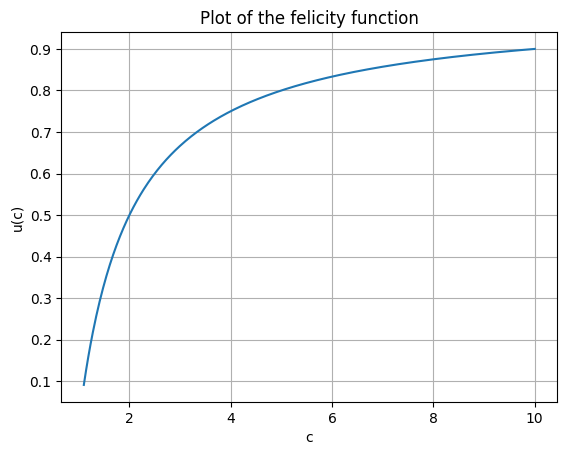

In [22]:
# graphing the felicity function

def ff(c):
    return 1 - c ** -1

# Generate a range of values for c
c_values = np.linspace(1.1, 10, 400)  # Avoid division by zero by starting from 1.1

# Calculate the corresponding values of f(c)
f_values = ff(c_values)

# Create the plot
plt.plot(c_values, f_values, label=r'$f(c) = 1 - c^{-1}$')
plt.xlabel('c')
plt.ylabel('u(c)')
plt.title('Plot of the felicity function')
plt.grid(True)
plt.show()


# Asset Price Equation as a Function of the State

$u(c_0 -qz) + \beta[\pi_1 u(c_1(s_1) + r_1 z) + \pi_2u(c_1(s_2) + r_2z)]$

where q = price, z = quantity purchased

$\implies 0 = -qu'(c_0-qz) + \beta[\pi_1 u'(c_1(s_1) + r_1 z)r_1 + \pi_2u(c_1(s_2) + r_2 z)r_2]$

Because the optimal price will lead us indifferent to buying a unit of the good, we set z = 0, to find 

$q = \frac{\beta}{u'(c_0)}[\pi_1 u'(c_1(s_1))r_1 + \pi_2u'(c_1(s_2))r_2]$

The probabilities $\pi_1$ and $\pi_2$ will vary based on the current state, and are given to us in the markov matrix

$$
\implies q(s_i) = 
\begin{cases}
\frac{\beta}{u'(c(s_1))}[(0.8) u'(c(s_1))r_1 + (0.2)u(c(s_2))r_2], & \text{if  } i = 1 \\
\frac{\beta}{u'(c(s_2))}[(0.1) u'(c(s_1))r_1 + (0.9)u(c(s_2))r_2], & \text{if  } i = 2 
\end{cases}

$$



# Asset Price for Each state

If we plug in the parameter values given above, we find the following;

$q(s_1) = 0.97 (0.8 + 0.191) = 0.96$

and $q(s_2) = 1.05$

# Long-Run Distribution of States

We can leverage the quant econ package to derive the stationary distribution for M. This is the distribution such that $[\pi_1, \pi_2]M = [\pi_1, \pi_2]$

In [23]:
M = [
    [0.8, 0.2],
    [0.1, 0.9]
    ]

mc = qe.MarkovChain(M)
mc.stationary_distributions  # Show all stationary distributions

array([[0.33333333, 0.66666667]])

# Long Run Average Price of Stock

The long run average price of a stock will be determined by the stationary distribution. We simply take the expected value of the price;

$E[q(s_i)] = \pi_1 * q(s_1) + \pi_2 * q(s_2) = 0.33 * 0.96 + 0.66 * 1.05 = 1.01$

In [27]:
time_series = pd.read_excel(r"C:\Users\jonat\OneDrive\econometrics\dynamic_stochastic\data\time_series_midterm_2025.xlsx")
time_series.head()

,x1,x2,x3,x4
0,0.647689,0.677899,0.647689,0.647689
1,1.911643,1.819221,2.170718,2.105950
2,0.718526,0.656899,1.936565,1.661201
3,-0.376514,-0.046608,1.702428,1.260944
4,1.137746,1.415314,3.281641,2.714063


In [33]:
# decompose into our four time series

ts1 = time_series["x1"]
ts2 = time_series["x2"]
ts3 = time_series["x3"]
ts4 = time_series["x4"]

# Plotting the Time Series

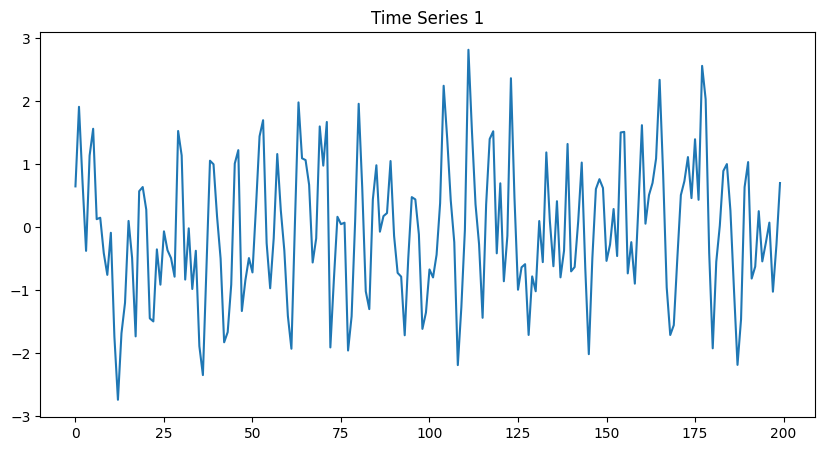

In [29]:
ts1.plot(title="Time Series 1", figsize=(10,5))
plt.show()

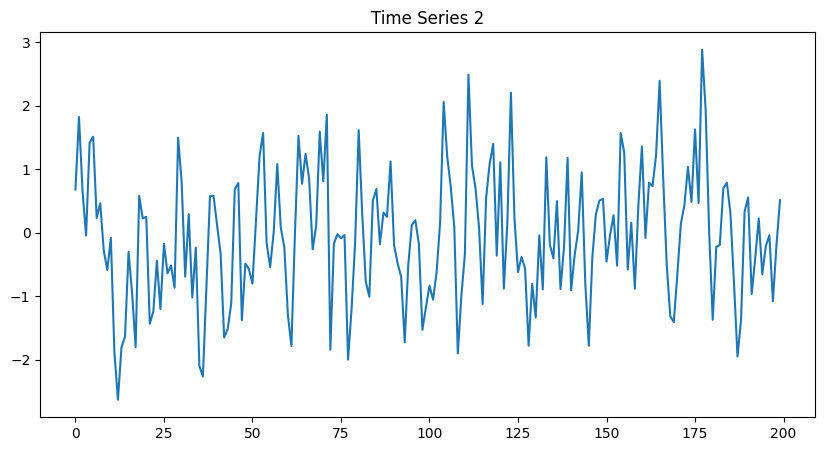

In [30]:
ts2.plot(title="Time Series 2", figsize=(10,5))
plt.show()

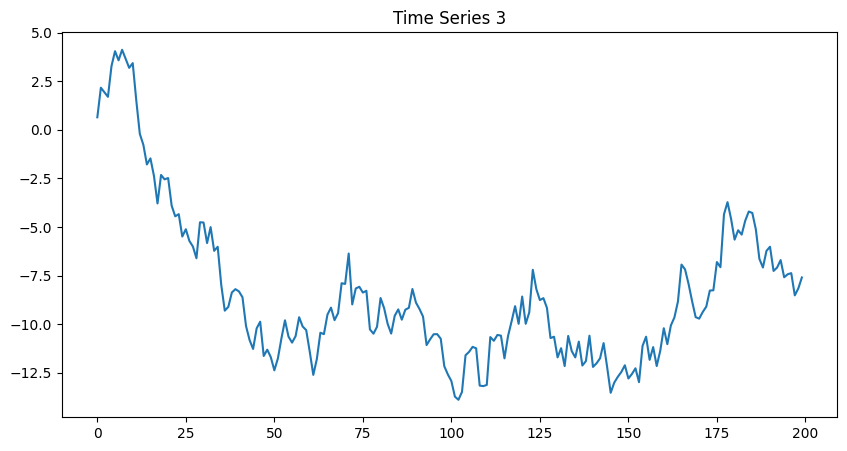

In [31]:
ts3.plot(title="Time Series 3", figsize=(10,5))
plt.show()

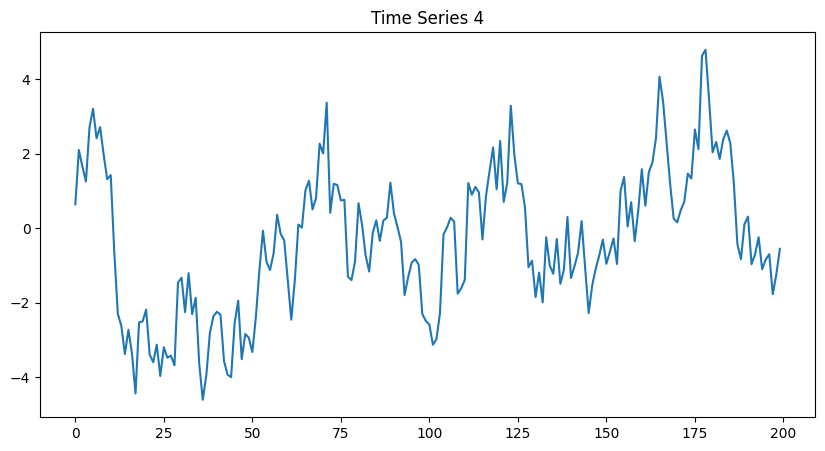

In [34]:
ts4.plot(title="Time Series 4", figsize=(10,5))
plt.show()


# Plotting Autocorrelations
AR(1): Exhibits an exponentially decaying autocorrelation, with the decay rate directly determined by the parameter 
𝜙
AR(2): The autocorrelation function can be a combination of exponentials or exhibit damped oscillations depending on whether the characteristic roots are real or complex.

MA(2): Has non-zero autocorrelations only for lags 1 and 2, and then zero for all higher lags.
Random Walk: The levels of a random walk are highly persistent (very high autocorrelation), but this is a feature of its non-stationarity; differenced, it becomes white noise.

<StemContainer object of 3 artists>

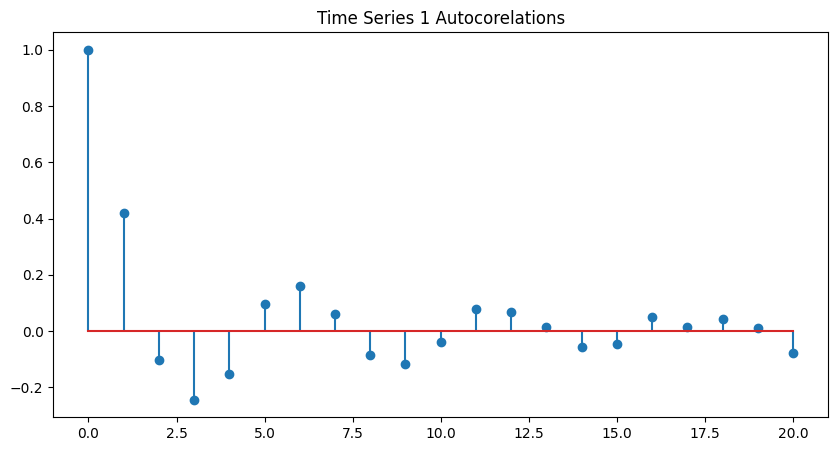

In [51]:
acf_values = acf(ts1, nlags = 20)

plt.figure(figsize=(10, 5))
plt.title("Time Series 1 Autocorelations")
plt.stem(range(len(acf_values)), acf_values)

<StemContainer object of 3 artists>

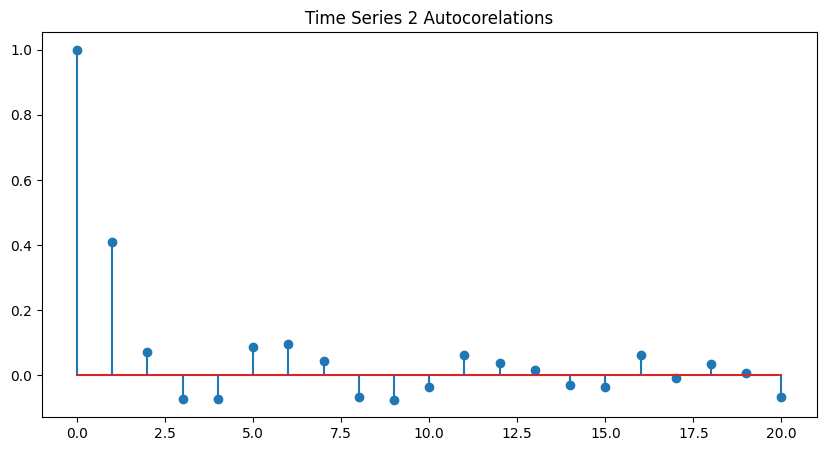

In [45]:
acf_values = acf(ts2, nlags = 20)

plt.figure(figsize=(10, 5))
plt.title("Time Series 2 Autocorelations")
plt.stem(range(len(acf_values)), acf_values)

<StemContainer object of 3 artists>

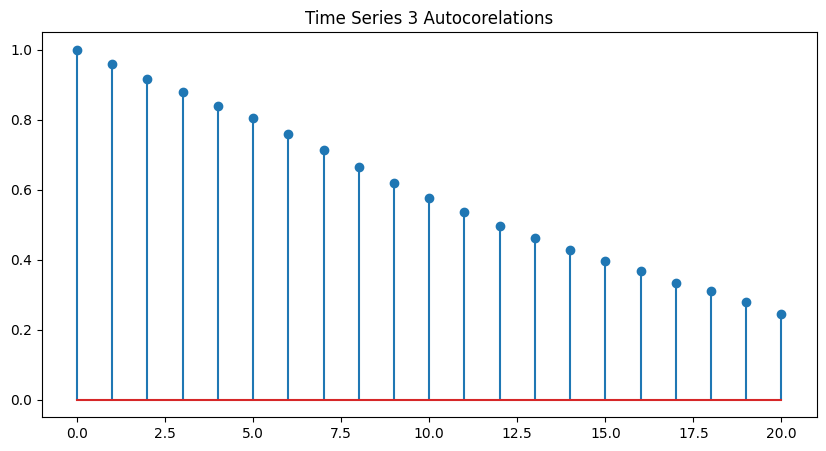

In [46]:
acf_values = acf(ts3, nlags = 20)

plt.figure(figsize=(10, 5))
plt.title("Time Series 3 Autocorelations")
plt.stem(range(len(acf_values)), acf_values)

Because this time series exhibits uniform, slow decay, we know that time series 3 is a random walk

<StemContainer object of 3 artists>

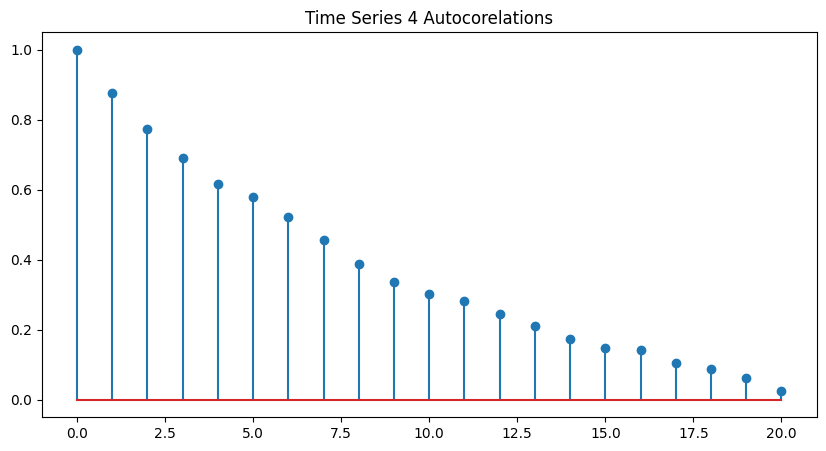

In [47]:
acf_values = acf(ts4, nlags = 20)

plt.figure(figsize=(10, 5))
plt.title("Time Series 4 Autocorelations")
plt.stem(range(len(acf_values)), acf_values)

Because this series exhibits exponential decay with no oscillation, we know time series 4 is an AR1 process

# Maximum Likelihood Estimation for Time Series Parameters

In [21]:
def estimate_ar1_mle(series):
    """
    Estimate MLE parameters for an AR(1) process with no constant term.
    """
    series = np.asarray(series)
    X_t = series[1:]
    X_t1 = series[:-1]
    phi_hat = np.sum(X_t * X_t1) / np.sum(X_t1 ** 2)
    return phi_hat

def estimate_ar2_mle(series):
    """
    Estimate MLE parameters for an AR(2) process with no constant term.
    """
    series = np.asarray(series)
    X_t = series[2:]
    X_t1 = series[1:-1]
    X_t2 = series[:-2]
    X = np.column_stack((X_t1, X_t2))
    y = X_t
    phi1_hat, phi2_hat = np.linalg.lstsq(X, y, rcond=None)[0]
    return phi1_hat, phi2_hat

def estimate_ma2_mle(series):
    """
    Estimate MLE parameters for an MA(2) process with no constant term.
    """
    series = np.asarray(series)
    T = len(series)
    def neg_log_likelihood(params):
        theta1, theta2 = params
        residuals = np.zeros(T)
        for t in range(2, T):
            residuals[t] = series[t] - (theta1 * residuals[t-1] + theta2 * residuals[t-2])
        log_likelihood = -0.5 * np.sum(residuals ** 2)
        return -log_likelihood
    initial_guess = [0, 0]
    result = minimize(neg_log_likelihood, initial_guess, method='L-BFGS-B')
    theta1_hat, theta2_hat = result.x
    return theta1_hat, theta2_hat

def estimate_rw_mle(series):
    """
    Estimate MLE parameters for a random walk with no constant term.
    """
    return None  # No parameters to estimate for a random walk

# Example usage
data = np.array([10, 12, 15, 18, 22, 25, 28, 30, 33])  # Sample series
phi_hat = estimate_ar1_mle(data)
print(f"Estimated phi: {phi_hat:.4f}")

phi1_hat, phi2_hat = estimate_ar2_mle(data)
print(f"Estimated phi1: {phi1_hat:.4f}")
print(f"Estimated phi2: {phi2_hat:.4f}")

theta1_hat, theta2_hat = estimate_ma2_mle(data)
print(f"Estimated theta1: {theta1_hat:.4f}")
print(f"Estimated theta2: {theta2_hat:.4f}")

Estimated phi: 1.1283
Estimated phi1: 1.8475
Estimated phi2: -0.8228
Estimated theta1: 1.4051
Estimated theta2: 0.7872
